In [1]:
import networkx as nx
import numpy as np
G = nx.Graph()


In [2]:
G.add_node(1)

In [4]:
G.add_nodes_from([2, 3])

In [5]:
H = nx.path_graph(10)
G.add_nodes_from(H)

In [7]:
G.add_edge(1, 2)
e = (2, 3)
G.add_edge(*e)

In [8]:
G.add_edges_from([(1, 2), (3, 4)])

In [9]:
G.add_edges_from(H.edges)

In [21]:
G.clear()

In [22]:
G.add_edges_from([(1, 2), (1, 3)])
G.add_node(1)
G.add_edge(1, 2)
G.add_node("spam")
G.add_nodes_from("spam")
G.add_edge(3, 'm')

In [23]:
print(G.number_of_nodes())
print(G.number_of_edges())

8
3


In [24]:
print(list(G.nodes))
print(list(G.edges))
print(list(G.adj[1]))
print(G.degree[1])

[1, 2, 3, 'spam', 's', 'p', 'a', 'm']
[(1, 2), (1, 3), (3, 'm')]
[2, 3]
2


In [25]:
G.remove_node(2)
G.remove_nodes_from("spam")
print(list(G.nodes))
G.remove_edge(1, 3)
print(list(G.edges))

[1, 3, 'spam']
[]


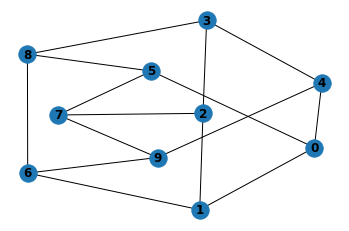

In [26]:
import matplotlib.pyplot as plt

G = nx.petersen_graph()
plt.plot()
nx.draw(G, with_labels=True, font_weight='bold')

In [27]:
G.add_node(1, time='5pm')
G.add_nodes_from([3], time='2pm')
print(G.nodes[1])
G.nodes[1]['room'] = 714
print(G.nodes.data())

{'time': '5pm'}
[(0, {}), (1, {'time': '5pm', 'room': 714}), (2, {}), (3, {'time': '2pm'}), (4, {}), (5, {}), (6, {}), (7, {}), (8, {}), (9, {})]


In [28]:
G.add_edge(1, 2, weight=4.7)
G.add_edges_from([(3, 4), (4, 5)], color='red')
G.add_edges_from([(1, 2, {'color': 'blue'}), (2, 3, {'weight': 8})])
G[1][2]['weight'] = 4.7
G.edges[3, 4]['weight'] = 4.2
print(G.edges.data())

[(0, 1, {}), (0, 4, {}), (0, 5, {}), (1, 2, {'weight': 4.7, 'color': 'blue'}), (1, 6, {}), (2, 3, {'weight': 8}), (2, 7, {}), (3, 4, {'color': 'red', 'weight': 4.2}), (3, 8, {}), (4, 9, {}), (4, 5, {'color': 'red'}), (5, 7, {}), (5, 8, {}), (6, 8, {}), (6, 9, {}), (7, 9, {})]


In [32]:
DG = nx.DiGraph()
DG.add_weighted_edges_from([(1, 2, 0.5), (3, 1, 0.75)])
print(DG.out_degree(1, weight='weight'))
print(DG.degree(1, weight='weight'))
print(list(DG.successors(1)))
print(list(DG.neighbors(1)))

0.5
1.25
[2]
[2]


In [33]:
H = nx.Graph(G)

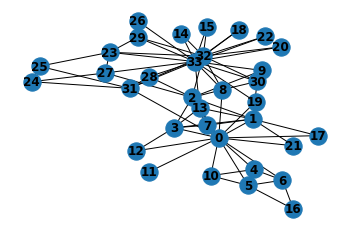

In [35]:
G = nx.karate_club_graph()
plt.plot()
nx.draw_spring(G, with_labels=True, font_weight='bold')

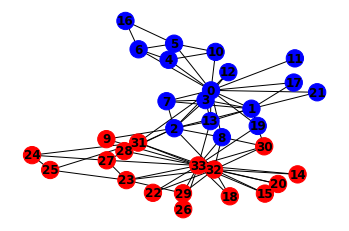

In [40]:
node_color_club = []
for node in G.nodes(data=True):
    if 'Mr. Hi' in node[1]['club']:
        node_color_club.append('blue')
    if 'Officer' in node[1]['club']:
        node_color_club.append('red')

plt.plot()
nx.draw_spring(G, with_labels=True, font_weight='bold', node_color=node_color_club)

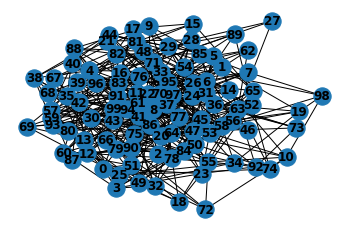

In [41]:
G = nx.erdos_renyi_graph(100, 0.1)
plt.plot()
nx.draw_spring(G, with_labels=True, font_weight='bold')

PageRank

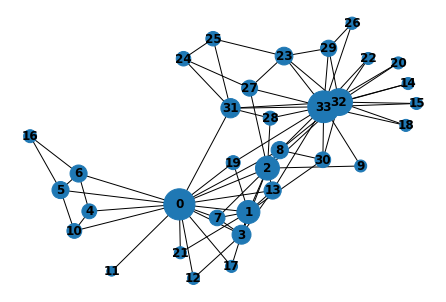

In [42]:
G = nx.karate_club_graph()
pr = nx.pagerank(G)

node_size = [0] * G.number_of_nodes()

index = 0
for node in G.nodes(data=True):
    node_size[index] = pr[node[0]] * 10000
    index += 1

nx.draw_spring(G, with_labels=True, font_weight='bold', node_size=node_size)

Ranking: Closeness Centrality

In [ ]:
from networkx.algorithms.centrality import closeness_centrality

G = nx.read_edgelist("lesmis.csv", delimiter='.')
pr = closeness_centrality(G)
node_size = [0] * G.number_of_nodes()
index = 0
for node in G.nodes(data=True):
    node_size[index] = pr[node[0]] * 1000
    index += 1 
    
nx.draw_spring(G, with_labels=True, font_weight='bold', node_size=node_size)

Community Detection: Greedy

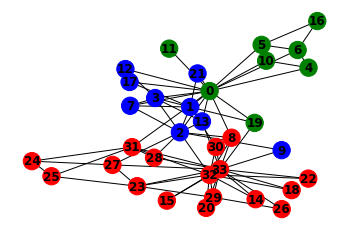

In [43]:
from networkx.algorithms.community import greedy_modularity_communities

np.random.seed(0)

G = nx.karate_club_graph()
communities = list(greedy_modularity_communities(G))

node_color_community = [0] * G.number_of_nodes()
colors = ['red', 'blue', 'green', 'purple']

for i in range(len(communities)):
    for node in communities[i]:
        node_color_community[node] = colors[i]

plt.plot()
nx.draw_spring(G, with_labels=True, font_weight='bold', node_color=node_color_community)

Community Detection: Bipartition

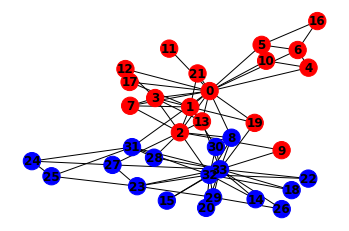

In [45]:
from networkx.algorithms.community.kernighan_lin import kernighan_lin_bisection

np.random.seed(0)

G = nx.karate_club_graph()
communities = list(kernighan_lin_bisection(G))

node_color_partition = [0] * G.number_of_nodes()
colors = ['red', 'blue']

for i in range(len(communities)):
    for node in communities[i]:
        node_color_partition[node] = colors[i]

plt.plot()
nx.draw_spring(G, with_labels=True, font_weight='bold', node_color=node_color_partition)

Dimensionality Reduction (Node Embedding): SVD

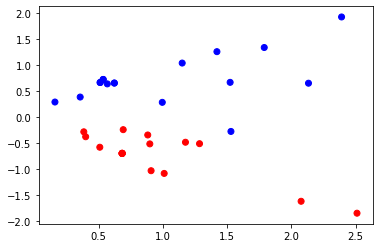

In [46]:
from sklearn.decomposition import TruncatedSVD

G = nx.karate_club_graph()
A = nx.adjacency_matrix(G)

svd = TruncatedSVD(n_components=2)
X = svd.fit_transform(A)

plt.scatter(X[:,0], X[:,1], c=node_color_club)

Dimensionality Reduction (Node Embedding): MDS

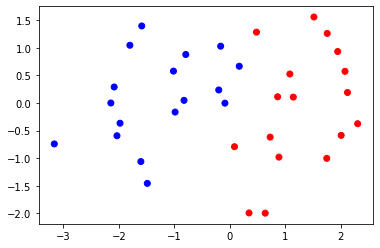

In [47]:
from sklearn.manifold import MDS

G = nx.karate_club_graph()
n = G.number_of_nodes()

D = np.zeros(shape=(n,n))
for i in range(n):
    for j in range(n):
        D[i][j] = nx.shortest_path_length(G, i, j)

mds = MDS(n_components=2, dissimilarity='precomputed')
X = mds.fit_transform(D)

plt.scatter(X[:,0], X[:,1], c=node_color_club)

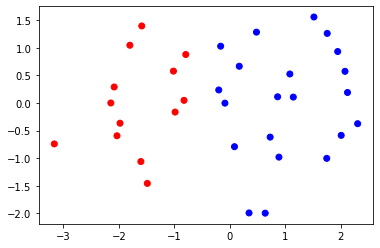

In [48]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2).fit(X)

node_color_clusters = []
for cluster in kmeans.labels_:
    if cluster == 0:
        node_color_clusters.append('red')
    elif cluster == 1:
        node_color_clusters.append('blue')
plt.scatter(X[:,0], X[:,1], c=node_color_clusters)

Node Classification: local and global consistency

In [51]:
from networkx.algorithms.node_classification.lgc import local_and_global_consistency

G_train = nx.karate_club_graph()
nodes_to_test = [1,4,6,10,13,16,19,22,25,28]

for i in nodes_to_test:
    del G_train.nodes[i]['club']

prediction = local_and_global_consistency(G_train, label_name='club')
G_test = nx.karate_club_graph()

print('Node','\t','Prediction','\t','Answer')
num_correct = 0
for i in nodes_to_test:
    print(str(i), '\t', prediction[i], '\t', G_test.nodes[i]['club'])
    if prediction[i] == G_test.nodes[i]['club']:
        num_correct += 1
print('\n')
print('Test Error: ', str(num_correct/len(nodes_to_test)))

Node 	 Prediction 	 Answer
1 	 Mr. Hi 	 Mr. Hi
4 	 Mr. Hi 	 Mr. Hi
6 	 Mr. Hi 	 Mr. Hi
10 	 Mr. Hi 	 Mr. Hi
13 	 Officer 	 Mr. Hi
16 	 Mr. Hi 	 Mr. Hi
19 	 Officer 	 Mr. Hi
22 	 Officer 	 Officer
25 	 Officer 	 Officer
28 	 Officer 	 Officer


Test Error:  0.8


Link Prediction

In [53]:
G = nx.karate_club_graph()
edges = list(G.edges().data())

edges_to_remove = set()
for i in [5, 10, 15, 20, 25, 30, 35, 40, 45, 50]:
    src = edges[i][0]
    dst = edges[i][1]
    edges_to_remove.add((src, dst))
    G.remove_edge(src, dst)
    print('Edge (' + str(src) + ',' + str(dst) + ') is missing!')
    
scores = list(nx.adamic_adar_index(G))
score_sum_total = 0
score_sum_missing_edges = 0

for (src, dst, score) in scores:
    score_sum_total += score
    if (src, dst) in edges_to_remove:
        score_sum_missing_edges += score

print('Average AA-index of missing edges: '+str(score_sum_missing_edges/10))
print('Average AA-index of all pairs: '+str(score_sum_total/len(scores)))

Edge (0,6) is missing!
Edge (0,12) is missing!
Edge (0,31) is missing!
Edge (1,17) is missing!
Edge (2,7) is missing!
Edge (2,28) is missing!
Edge (4,6) is missing!
Edge (6,16) is missing!
Edge (13,33) is missing!
Edge (18,32) is missing!
Average AA-index of missing edges: 0.4180230891679247
Average AA-index of all pairs: 0.27080114641501546
